In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Course_work/notebooks/data/df_morgan_fp_4.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,pdbcode,affinity,pocket_morgan_fp
0,3zzf,0.40,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,3gww,0.45,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,1w8l,0.49,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,3fqa,0.49,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1zsb,0.60,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [4]:
def to_list(string):
    fp = []
    i = 1
    while i < len(string):
        fp.append(int(string[i]))
        i += 3
    return fp

In [5]:
feature = 'pocket_morgan_fp'

In [6]:
df[feature] = df[feature].apply(lambda x: to_list(x))
df.head()

,pdbcode,affinity,pocket_morgan_fp
0,3zzf,0.40,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,3gww,0.45,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,1w8l,0.49,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,3fqa,0.49,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1zsb,0.60,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


## Train/Val/Test separation

In [7]:
df_train = pd.read_csv('/content/drive/MyDrive/Course_work/notebooks/data/df_train.csv')
df_train.drop(columns = ['Unnamed: 0'], inplace = True)

df_val = pd.read_csv('/content/drive/MyDrive/Course_work/notebooks/data/df_val.csv')
df_val.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
code_train = df_train.pdbcode.values
code_val = df_val.pdbcode.values

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for code in code_train:
  fp = df[df.pdbcode == code][feature].values[0]
  aff = df[df.pdbcode == code].affinity.values[0]
  x_train.append(fp)
  y_train.append(aff)

for code in code_val:
  fp = df[df.pdbcode == code][feature].values[0]
  aff = df[df.pdbcode == code].affinity.values[0]
  x_val.append(fp)
  y_val.append(aff)

In [10]:
x_train = [np.array(lst) for lst in x_train]
x_val = [np.array(lst) for lst in x_val]

y_train = np.array(y_train)
y_val = np.array(y_val)

In [11]:
x_train = np.stack(x_train, axis=0)
x_val = np.stack(x_val, axis=0)

In [12]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(13044, 2048) (13044,)
(3745, 2048) (3745,)


## NN inplementation

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = 2048, activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

In [14]:
NN_model = Sequential([
                    Dense(512, kernel_initializer='normal', input_dim = 2048, activation='relu'),
                    Dropout(0.2),
                    Dense(256, kernel_initializer='normal', activation='relu'),
                    Dropout(0.2),
                    Dense(256, kernel_initializer='normal', activation='relu'),
                    Dropout(0.2),
                    Dense(256, kernel_initializer='normal', activation='relu'),
                    Dropout(0.2),
                    Dense(128, kernel_initializer='normal', activation='relu'),
                    Dense(1, kernel_initializer='normal', activation='linear')
])
NN_model.build()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [15]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [17]:
NN_model.load_weights('/content/drive/MyDrive/Course_work/notebooks/weights/morgan_fp4_2.h5')

In [ ]:
#history = NN_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data = (x_val, y_val), callbacks=callbacks_list)

In [18]:
pred_train = NN_model.predict(x_train)
pred_val = NN_model.predict(x_val)

#df_val['morgan_fp4_0'] = pred_val
#df_val.to_csv('/content/drive/MyDrive/Course_work/notebooks/data/df_val.csv')

In [19]:
print('mae, mse:')
print('train:', mean_absolute_error(y_train, pred_train), mean_squared_error(y_train, pred_train, squared = False))
print('val:', mean_absolute_error(y_val, pred_val), mean_squared_error(y_val, pred_val, squared = False))

mae, mse:
train: 0.38477662812416924 0.5688087889690523
val: 1.0453865055776885 1.3824861902351562


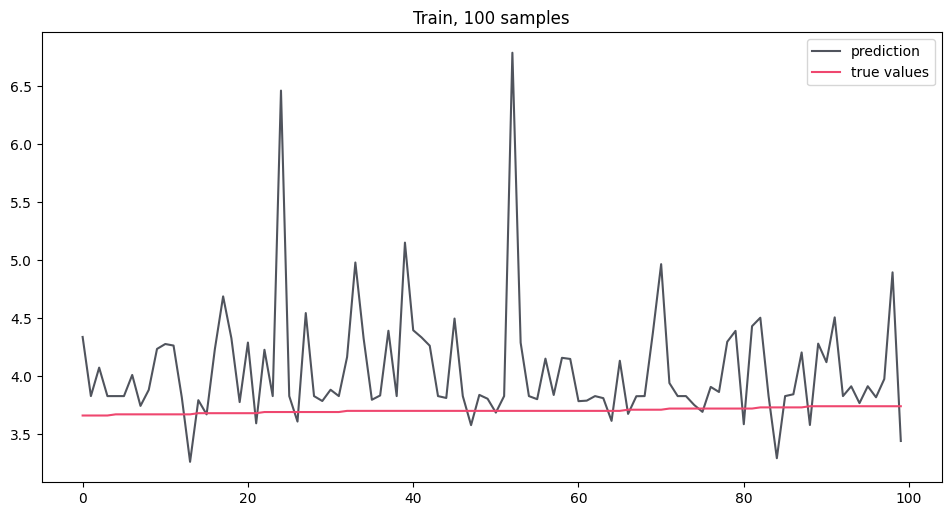

In [20]:
df_train_draw = pd.DataFrame({'code' : code_train, 
                      'affinity' : y_train,
                      'prediction' : np.reshape(pred_train, (pred_train.shape[0],))})
df_train_draw.sort_values(by = 'affinity', inplace = True)

fig = plt.figure(figsize=(10, 5),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(range(100), df_train_draw.prediction[1000:1100], color = '#50545D', label = 'prediction')
ax.plot(range(100), df_train_draw.affinity[1000:1100], color = '#EF476F', label = 'true values')
ax.set_title('Train, 100 samples')
ax.legend()

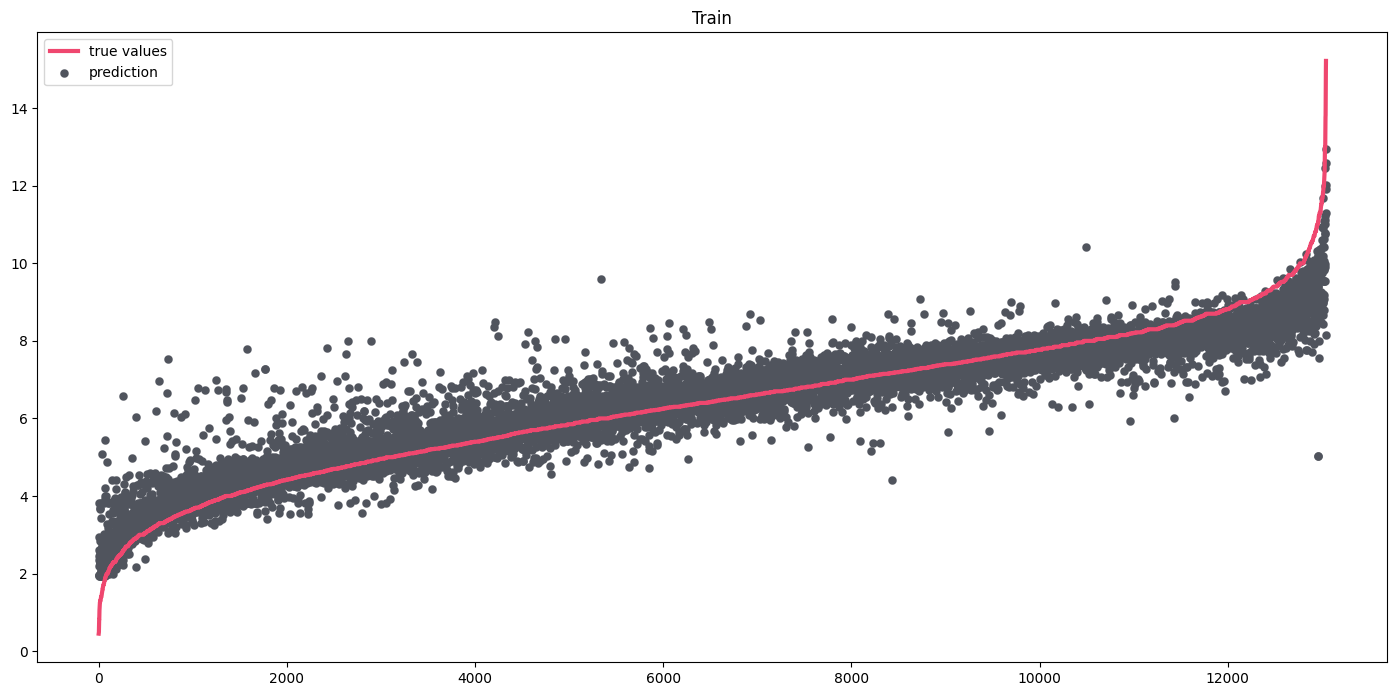

In [24]:
fig = plt.figure(figsize=(15, 7),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(range(df_train.shape[0]), df_train_draw.prediction, color = '#50545D', label = 'prediction', linewidth = 0.1)
ax.plot(range(df_train.shape[0]), df_train_draw.affinity, color = '#EF476F', label = 'true values', linewidth = 3)
ax.set_title('Train')
ax.legend()

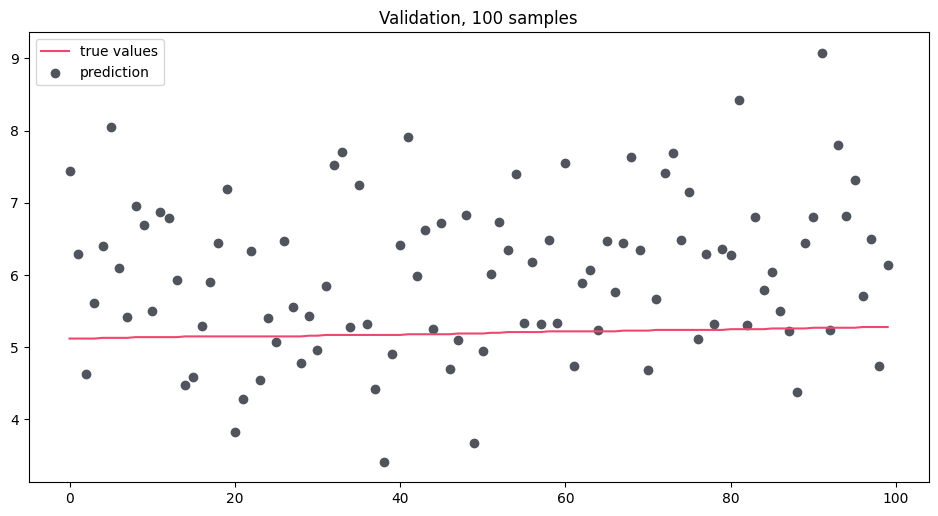

In [25]:
df_val_draw = pd.DataFrame({'code' : code_val, 
                      'affinity' : y_val,
                      'prediction' : np.reshape(pred_val, (pred_val.shape[0],))})
df_val_draw.sort_values(by = 'affinity', inplace = True)

fig = plt.figure(figsize=(10, 5),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(range(100), df_val_draw.prediction[1000:1100], color = '#50545D', label = 'prediction')
ax.plot(range(100), df_val_draw.affinity[1000:1100], color = '#EF476F', label = 'true values')
ax.set_title('Validation, 100 samples')
ax.legend()

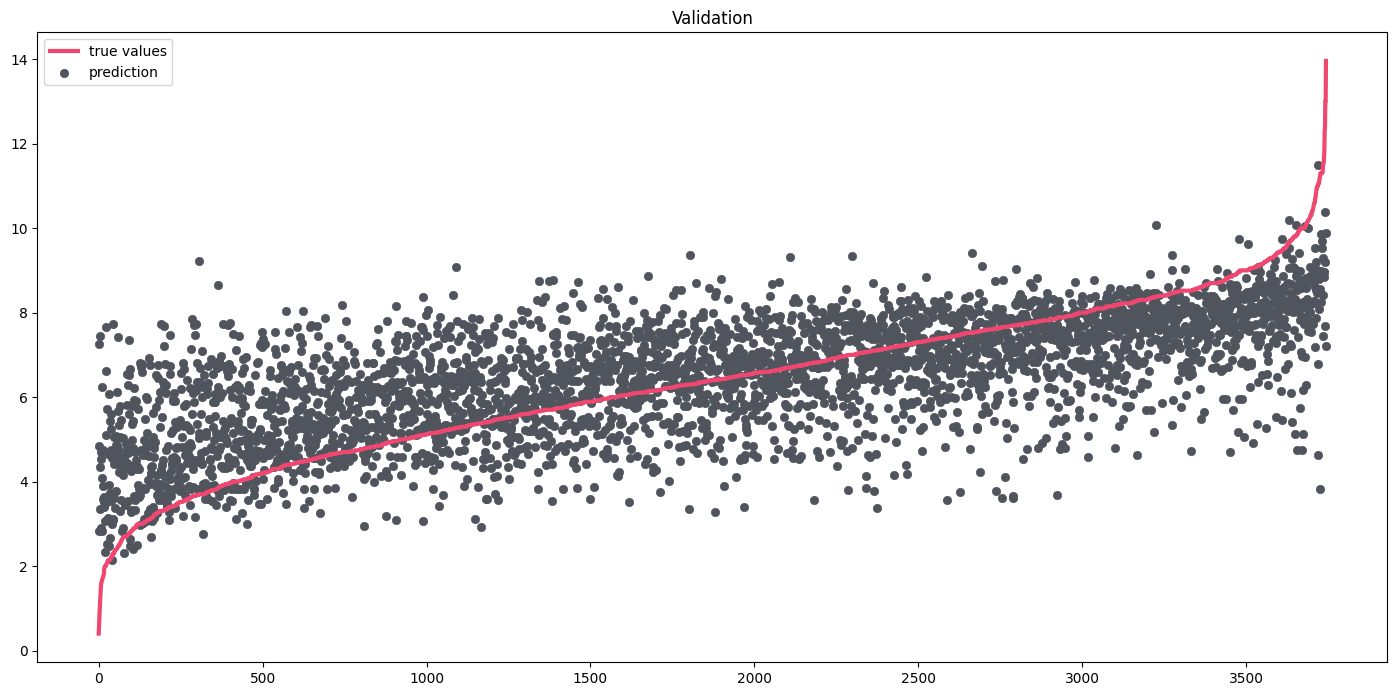

In [26]:
df_val_draw = pd.DataFrame({'code' : code_val, 
                      'affinity' : y_val,
                      'prediction' : np.reshape(pred_val, (pred_val.shape[0],))})
df_val_draw.sort_values(by = 'affinity', inplace = True)

fig = plt.figure(figsize=(15, 7),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(range(df_val.shape[0]), df_val_draw.prediction, color = '#50545D', label = 'prediction', linewidth = 0.5)
ax.plot(range(df_val.shape[0]), df_val_draw.affinity, color = '#EF476F', label = 'true values', linewidth = 3)
ax.set_title('Validation')
ax.legend()

### Saving model

In [ ]:
NN_model.save_weights('/content/drive/MyDrive/Course_work/notebooks/weights/morgan_fp4_0.h5')